In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

warnings.filterwarnings("ignore")

/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv
/kaggle/input/human-stress-detection-in-and-through-sleep/IEEE-TCE_2020-08-0175_SaYoPillow.pdf
/kaggle/input/human-stress-detection-in-and-through-sleep/readme.docx


In [2]:
!pip install sdv

     |████████████████████████████████| 101 kB 715 kB/s           
     |████████████████████████████████| 97 kB 1.6 MB/s            
     |████████████████████████████████| 1.2 MB 4.6 MB/s            
     |████████████████████████████████| 46 kB 2.4 MB/s             
     |████████████████████████████████| 52 kB 937 kB/s             
     |████████████████████████████████| 45 kB 2.0 MB/s             
     |████████████████████████████████| 636 kB 34.3 MB/s            
     |████████████████████████████████| 2.5 MB 69.2 MB/s            
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

# Read Data in and do head

In [3]:
np.random.seed(42)
dataset = pd.read_csv("../input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")

dataset.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Change names of columns


In [4]:
dataset = dataset.rename(columns={"sr" : "Snoring Range", "rr" : "Respiration Rate", "t": "Body Temp", "lm" : "Limb Movement",
                       "bo" : "Blood Oxygen", "rem" : "Eye Movement", "sr.1" : "Sleeping Hours", "hr" : "Heart Rate", "sl" : "Stress Level"})

dataset.head()

,Snoring Range,Respiration Rate,Body Temp,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Show distribution of the categories

Text(0, 0.5, 'Counts')

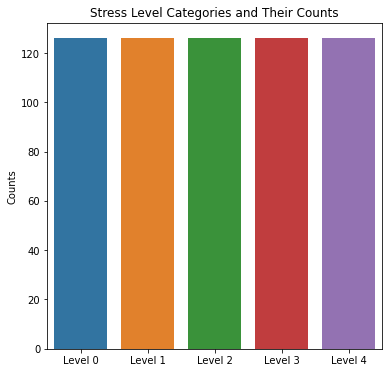

In [5]:
stress_0 = dataset[dataset["Stress Level"] == 0]
stress_1 = dataset[dataset["Stress Level"] == 1]
stress_2 = dataset[dataset["Stress Level"] == 2]
stress_3 = dataset[dataset["Stress Level"] == 3]
stress_4 = dataset[dataset["Stress Level"] == 4]

stress_level_categories = ["Level 0", "Level 1", "Level 2", "Level 3", "Level 4"]

stress_level_distribution = [len(stress_0), len(stress_1), len(stress_2), len(stress_3), len(stress_4)]

plt.figure(figsize=[6, 6])
sns.barplot(x=stress_level_categories, y=stress_level_distribution)

plt.title("Stress Level Categories and Their Counts")
plt.ylabel("Counts")

# Exploratory Data Analysis (plot average sleep for each category with seaborn barplot)

Text(0, 0.5, 'Average Hours of Sleep')

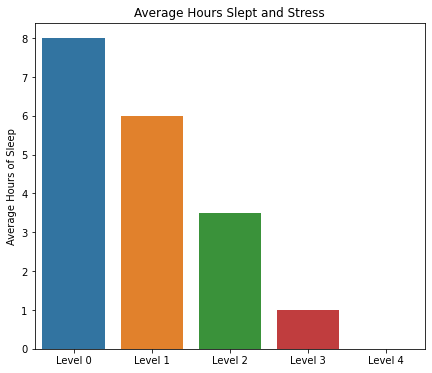

In [6]:
stress_0_sleep = np.mean(stress_0["Sleeping Hours"])
stress_1_sleep = np.mean(stress_1["Sleeping Hours"])
stress_2_sleep = np.mean(stress_2["Sleeping Hours"])
stress_3_sleep = np.mean(stress_3["Sleeping Hours"])
stress_4_sleep = np.mean(stress_4["Sleeping Hours"])

sleep_per_stress_level = [stress_0_sleep, stress_1_sleep, stress_2_sleep, stress_3_sleep, stress_4_sleep]

plt.figure(figsize=[7, 6])
plt.title("Average Hours Slept and Stress")
sns.barplot(x=stress_level_categories, y=sleep_per_stress_level)

plt.ylabel("Average Hours of Sleep")

# Correlation heatmap sns.heatmap(df.corr())

<AxesSubplot:>

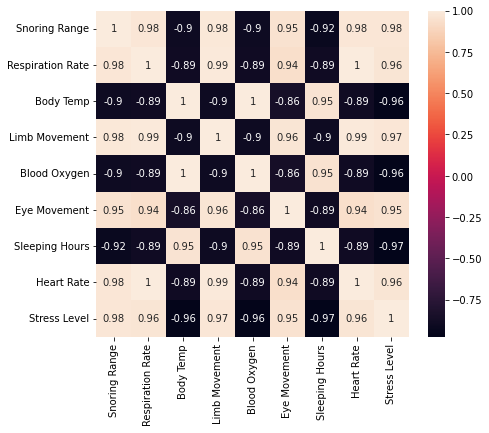

In [7]:
plt.figure(figsize=[7, 6])
sns.heatmap(dataset.corr(), annot=True)

# Snoring range, limb movement, and sleeping hours have the highest correlations, including both positive and negative. The paper mentioned snoring range being an important feature to use.

<AxesSubplot:xlabel='Limb Movement', ylabel='Density'>

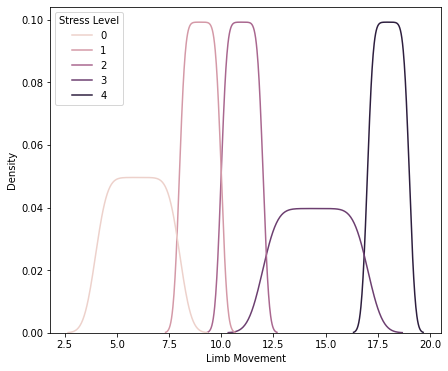

In [8]:
plt.figure(figsize=(7, 6))
sns.kdeplot(data=dataset, x="Limb Movement", hue="Stress Level")

# KDEPLOT shows high limb movement equals high stress.

Text(0, 0.5, 'Body Temperature (F)')

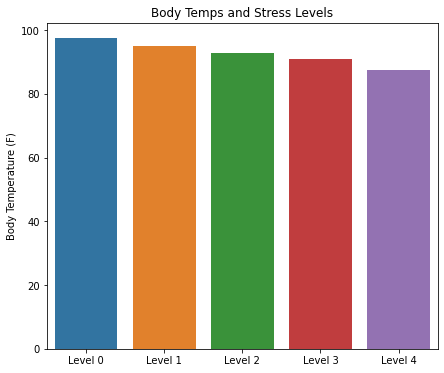

In [9]:
body_temps = [stress_0["Body Temp"].mean(), stress_1["Body Temp"].mean(), stress_2["Body Temp"].mean(), stress_3["Body Temp"].mean(), stress_4["Body Temp"].mean()]


plt.figure(figsize=[7, 6])
plt.title("Body Temps and Stress Levels")
sns.barplot(x=stress_level_categories, y=body_temps)
plt.ylabel("Body Temperature (F)")

# As stress increases, body temperature decreases.

# 

# train test split to get X_train, X_test, y_train, y_test. Check distribution after split.

In [10]:
from sklearn.model_selection import train_test_split

np_dataset = dataset.to_numpy()
all_x = np_dataset[:,0:8]
all_y = np_dataset[:,8]

features = ["Snoring Rate","Respiration Rate","Body Temp","Limb Movement","Blood Oxygen","Eye Movement","Sleeping Hours","Heart Rate"]

train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=.33, random_state=1)

# Train RandomForest Classifier and Predict

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_start = time.time()
RFmodel = RandomForestClassifier(random_state=1)
RFmodel.fit(train_x, train_y)
RF_pred_y = RFmodel.predict(test_x)
rf_stop = time.time()

# Train Gradient Boosting Classifier and Predict

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_start = time.time()
GBCmodel = GradientBoostingClassifier(random_state=1)
GBCmodel.fit(train_x, train_y)
GBC_pred_y = GBCmodel.predict(test_x)
gbc_stop = time.time()

# Train XGBoost Classifier and Predict

In [13]:
import xgboost as xgb

xgb_start = time.time()
XGBmodel = xgb.XGBClassifier(random_state=1)
XGBmodel.fit(train_x, train_y)
XGB_pred_y = XGBmodel.predict(test_x)
xgb_stop = time.time()

[14:26:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Train MLP and Predict

In [14]:
from sklearn.neural_network import MLPClassifier

mlp_start = time.time()
mlp_class = MLPClassifier(random_state=1)
mlp_class.fit(train_x, train_y)
MLP_pred_y = mlp_class.predict(test_x)
mlp_stop = time.time()

# cross validation of models

In [15]:
from sklearn.model_selection import cross_validate

rf_cross_val = cross_validate(estimator=RFmodel, X=test_x, y=test_y, cv=10)
gbc_cross_val = cross_validate(estimator=GBCmodel, X=test_x, y=test_y, cv=10)
xgb_cross_val = cross_validate(estimator=XGBmodel, X=test_x, y=test_y, cv=10)
mlp_cross_val = cross_validate(estimator=mlp_class, X=test_x, y=test_y, cv=10)

[14:26:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

# Accuracies from Cross Validation

In [16]:
RF_acc =  rf_cross_val["test_score"].mean() * 100
GBC_acc =  gbc_cross_val["test_score"].mean() * 100
XGB_acc =  xgb_cross_val["test_score"].mean() * 100
MLP_acc = mlp_cross_val["test_score"].mean() * 100

In [17]:
from sklearn.metrics import accuracy_score

# baseline of mode and random off of entire datset

In [18]:
import random
from scipy import stats

random.randint(0,4)
y_shape = np.array(all_y.shape)

random_guess_baseline = np.sum(all_y == [random.randint(0,4) for i in range(all_y.shape[0])]) / all_y.shape[0] * 100
mode_baseline = np.sum(all_y == [stats.mode(train_y)[0][0] for i in range(all_y.shape[0])]) / all_y.shape[0] * 100
median_baseline = np.sum(all_y == [np.median(train_y) for i in range(all_y.shape[0])]) / all_y.shape[0] * 100

In [19]:
models = ["Random Forest Classifier", "Gradient Boosting Classifier", "XGBoost Classifier", "MLP Classifier", "Random guessing","Mode guessing","Median guessing"]
accuracies = [RF_acc, GBC_acc, XGB_acc, MLP_acc, random_guess_baseline, mode_baseline, median_baseline]

# plot Accuracies

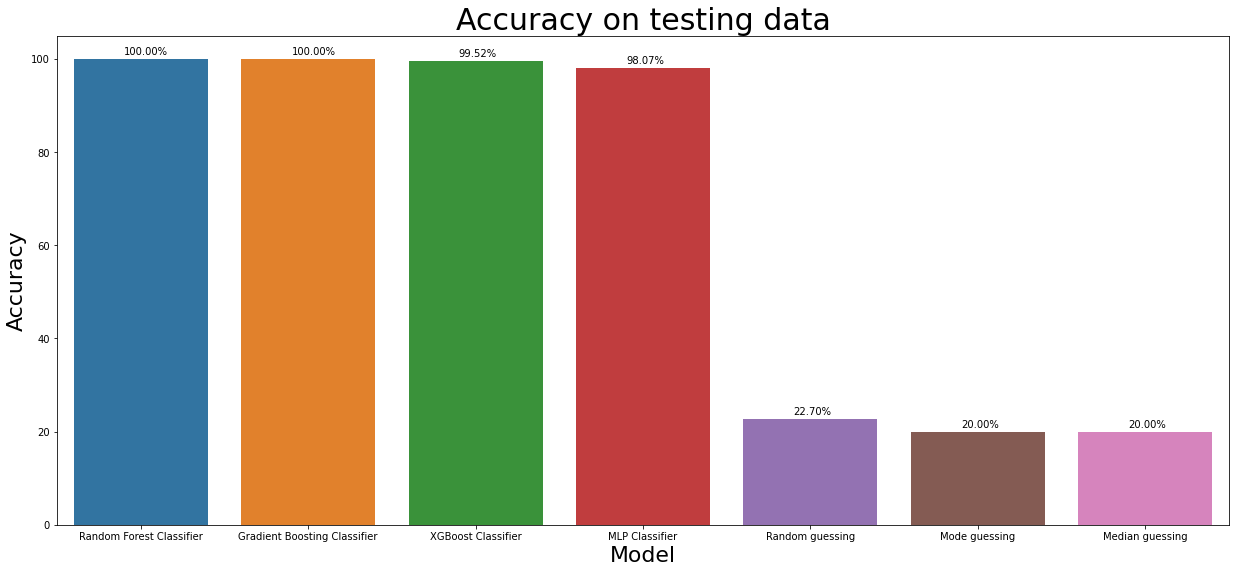

In [20]:
plt.figure(figsize=[21, 9])
sns.barplot(x=models, y=accuracies)
plt.title("Accuracy on testing data", fontsize=30)
plt.ylabel("Accuracy", fontsize=22)
plt.xlabel("Model", fontsize=22)
xlocs=[i+1 for i in range(0,10)]
for i, j in enumerate(accuracies):
    acc_pct = "{:.2f}".format(j)
    plt.text(xlocs[i] - 1.1, j+1, str(acc_pct)+'%')

# Feature Importances

In [21]:
def toString(list):
    newList = []
    for i in range(len(list)):
        a = "{:.4f}".format(list[i])
        if a == "0.0000":
            continue
        newList.insert(i, round(float(a) * 100, 2))
    return newList

In [22]:
RF_importance = toString((RFmodel.feature_importances_).tolist())
GBC_importance = toString((GBCmodel.feature_importances_).tolist())
XGB_importance = toString((XGBmodel.feature_importances_).tolist())

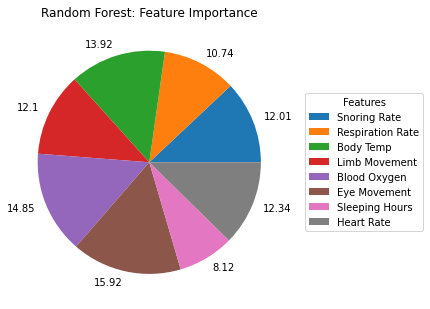

In [23]:
fig, ax = plt.subplots(figsize=(5,24))
ax.pie(RF_importance, labels=RF_importance)
plt.title('Random Forest: Feature Importance')
ax.legend(features[:len(RF_importance)], title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
plt.show()

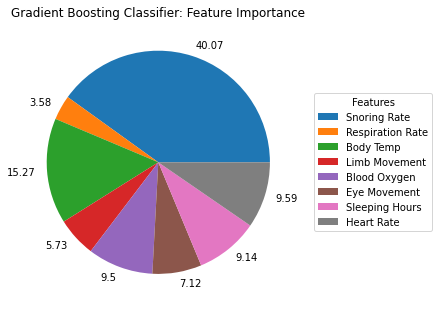

In [24]:
fig, ax = plt.subplots(figsize=(5,24))
ax.pie(GBC_importance, labels=GBC_importance)
plt.title('Gradient Boosting Classifier: Feature Importance')
ax.legend(features[:len(GBC_importance)], title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
plt.show()

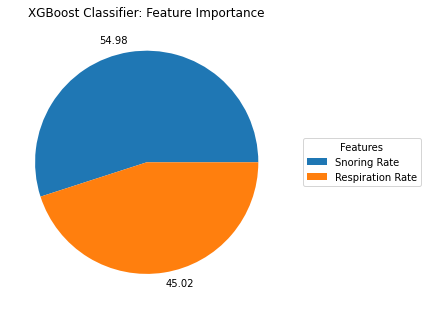

In [25]:
fig, ax = plt.subplots(figsize=(5,24))
ax.pie(XGB_importance, labels=XGB_importance)
plt.title('XGBoost Classifier: Feature Importance')
ax.legend(features[:len(XGB_importance)], title='Features',loc='center right', bbox_to_anchor=(1, 0, .5, 1))
plt.show()

# Add synthetic data

In [26]:
from sdv.tabular import CTGAN

synthetic = CTGAN()

synthetic.fit(dataset)

In [27]:
synth_data = synthetic.sample(num_rows=150)

In [28]:
dataset_list = [dataset, synth_data]
combined_synth_data = pd.concat(dataset_list)

# Only features will be Limb Movement, Snoring Range, and Sleep Hours. (See note below correlation heatmap.)

In [29]:
non_features = ["Respiration Rate", "Body Temp", "Heart Rate", "Blood Oxygen", "Eye Movement"]
combined_synth_data.drop(non_features, axis=1, inplace=True)

In [30]:
synth_features = combined_synth_data.columns[:-1]

x_train, x_test, y_train, y_test = train_test_split(combined_synth_data[synth_features], combined_synth_data["Stress Level"], random_state=1)

# Training and predicting with Random Forest

In [31]:
rf_start = time.time()
RFmodel.fit(x_train, y_train)
synth_rf_preds = RFmodel.predict(x_test)
rf_stop = time.time()

# Training and predicting with Gradient Boosting Classifier

In [32]:
gbc_start = time.time()
GBCmodel.fit(x_train, y_train)
synth_gbc_preds = GBCmodel.predict(x_test)
gbc_stop = time.time()

# Training and predicting with XGBoost Classifer

In [33]:
xgb_start = time.time()
XGBmodel.fit(x_train, y_train)
synth_xgb_preds = XGBmodel.predict(x_test)
xgb_stop = time.time()

[14:27:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Training and predicting with MLP

In [34]:
mlp_start = time.time()
mlp_class.fit(x_train, y_train)
synth_mlp_preds = mlp_class.predict(x_test)
mlp_stop = time.time()

# Cross Validation of the 4 models on the synthetic data

In [35]:
rf_cross_val = cross_validate(estimator=RFmodel, X=x_test, y=y_test, cv=10)
gbc_cross_val = cross_validate(estimator=GBCmodel, X=x_test, y=y_test, cv=10)
xgb_cross_val = cross_validate(estimator=XGBmodel, X=x_test, y=y_test, cv=10)
mlp_cross_val = cross_validate(estimator=mlp_class, X=x_test, y=y_test, cv=10)

[14:27:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

# Show table of models, accuracies, and runtimes

In [36]:

acc_runtime_table = pd.DataFrame({
    
    "Model" : ["Random Forest Classifier", "Gradient Boost Classifier", "XGBoost Classifier", "MLP Classifier"],
    "Accuracies %" : [round(rf_cross_val["test_score"].mean() * 100, 2), round(gbc_cross_val["test_score"].mean() * 100, 2), round(xgb_cross_val["test_score"].mean() * 100, 2), round(mlp_cross_val["test_score"].mean() * 100, 2)],
    "Run Time (ms)" : [round((rf_stop - rf_start) * 1000, 2), round((gbc_stop - gbc_start) * 1000, 2), round((xgb_stop - xgb_start) * 1000, 2), round((mlp_stop - mlp_start) * 1000, 2)]
})

acc_runtime_table

,Model,Accuracies %,Run Time (ms)
0,Random Forest Classifier,86.13,147.86
1,Gradient Boost Classifier,84.63,704.32
2,XGBoost Classifier,85.63,456.07
3,MLP Classifier,84.11,433.87


# Precision and Recall

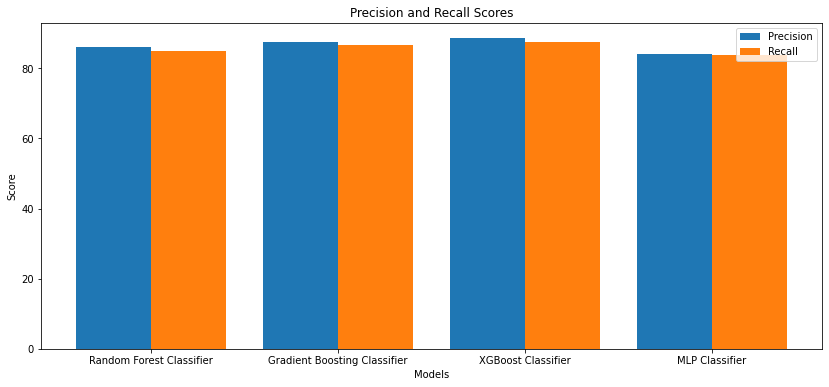

Preicison  85.98730158730159
Recall  84.95845914313766

Preicison  87.43615132160024
Recall  86.60004601044274

Preicison  88.5729009552539
Recall  87.50960673395693

Preicison  84.12915375940585
Recall  83.80830488491227



In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

RF_precision =  precision_score(y_test, synth_rf_preds, average='macro') * 100
GBC_precision =  precision_score(y_test, synth_gbc_preds, average='macro') * 100
XGB_precision =  precision_score(y_test, synth_xgb_preds, average='macro') * 100
MLP_precision =  precision_score(y_test, synth_mlp_preds, average='macro') * 100

RF_recall =  recall_score(y_test, synth_rf_preds, average='macro') * 100
GBC_recall =  recall_score(y_test, synth_gbc_preds, average='macro') * 100
XGB_recall =  recall_score(y_test, synth_xgb_preds, average='macro') * 100
MLP_recall =  recall_score(y_test, synth_mlp_preds, average='macro') * 100

names = ["Random Forest Classifier", "Gradient Boosting Classifier", "XGBoost Classifier", "MLP Classifier"]
precision = [RF_precision, GBC_precision, XGB_precision, MLP_precision]
recall = [RF_recall, GBC_recall, XGB_recall, MLP_recall]

plt.figure(figsize=[14, 6])
x_axis = np.arange(len(names))
plt.bar(x_axis - 0.2, precision, 0.4, label = 'Precision')
plt.bar(x_axis + 0.2, recall, 0.4, label = 'Recall')
plt.xticks(x_axis, names)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision and Recall Scores')
plt.legend()
plt.show()

for p, r in zip(precision, recall):
    print('Preicison ', p)
    print("Recall ", r)
    print()

# RandomForest was fastest and scored high each time. MLP scored inconsistently. 

# Hyperparameter Tuning

# Figure out best model and do confusion matrix

# Feature importance to see what sleep features matter